In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('ggplot')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [242]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [86]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year
count,3.445000e+04,3.445000e+04,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000
mean,2.113167e+07,7.983464e+07,40.728255,-73.949403,158.453991,7.966212,30.797533,1.480379,9.564296,160.070914,1713.647402
std,1.133844e+07,8.579000e+07,0.056094,0.050391,244.551067,22.952423,50.446386,1.747427,38.933375,130.456585,723.120642
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.216791e+07,8.481125e+06,40.688632,-73.983190,70.000000,2.000000,2.000000,0.200000,1.000000,32.000000,2018.000000
50%,2.284311e+07,3.993048e+07,40.723200,-73.954330,110.000000,3.000000,10.000000,0.880000,1.000000,141.000000,2019.000000
75%,3.104453e+07,1.400573e+08,40.762888,-73.931262,184.000000,5.000000,37.000000,2.260000,3.000000,292.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000


In [198]:
df.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5207
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
review_year                          0
revenue                              0
total_revenue                        0
average_revenue                      0
dtype: int64

In [243]:
# availability_365 = 0 suggests two things: a. when the listing has been removed, b. when the room has been booked
# in order to remove condition a from the data, I select those 0 availability posts when they have at least one review in 2019
df['last_review'] = pd.to_datetime(df['last_review'])
df['review_year'] = df['last_review'].apply(lambda last_review:last_review.year)
df['review_year'] = df['review_year'].fillna(0)
df['review_year'] = df.review_year.astype(int)
df = pd.concat([df[(df['availability_365']==0) & (df['review_year']==2019)],df[df['availability_365']>0]])

In [244]:
# fill NA data with 0 in reviews_per_month column
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34450 entries, 132 to 48894
Data columns (total 17 columns):
id                                34450 non-null int64
name                              34446 non-null object
host_id                           34450 non-null int64
host_name                         34440 non-null object
neighbourhood_group               34450 non-null object
neighbourhood                     34450 non-null object
latitude                          34450 non-null float64
longitude                         34450 non-null float64
room_type                         34450 non-null object
price                             34450 non-null int64
minimum_nights                    34450 non-null int64
number_of_reviews                 34450 non-null int64
last_review                       29243 non-null datetime64[ns]
reviews_per_month                 34450 non-null float64
calculated_host_listings_count    34450 non-null int64
availability_365                  34450 non-

In [111]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year
count,3.445000e+04,3.445000e+04,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000
mean,2.113167e+07,7.983464e+07,40.728255,-73.949403,158.453991,7.966212,30.797533,1.480379,9.564296,160.070914,1713.647402
std,1.133844e+07,8.579000e+07,0.056094,0.050391,244.551067,22.952423,50.446386,1.747427,38.933375,130.456585,723.120642
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.216791e+07,8.481125e+06,40.688632,-73.983190,70.000000,2.000000,2.000000,0.200000,1.000000,32.000000,2018.000000
50%,2.284311e+07,3.993048e+07,40.723200,-73.954330,110.000000,3.000000,10.000000,0.880000,1.000000,141.000000,2019.000000
75%,3.104453e+07,1.400573e+08,40.762888,-73.931262,184.000000,5.000000,37.000000,2.260000,3.000000,292.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000


In [115]:
df.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5207
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
review_year                          0
dtype: int64

Q1. How do boroughs differ?

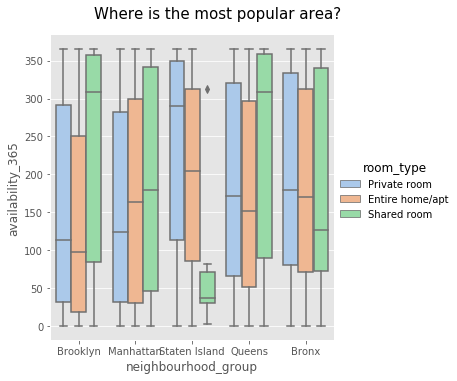

In [245]:
# Availability according to different room_type in different areas
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=df,palette='pastel')
fig.fig.suptitle('Where is the most popular area?',fontsize=15,y=1.05)
fig.savefig('popular_area.png', bbox_inches = 'tight')

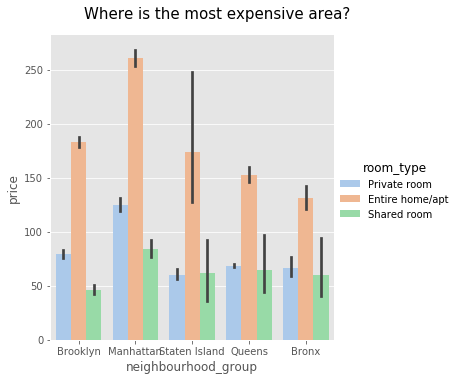

In [248]:
# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type',palette='pastel')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

Q2. Who are the most successful hosts?

In [249]:
df['revenue'] = (365-df['availability_365'])*df['price']
df['total_revenue'] = df.groupby('host_id')['revenue'].transform(sum)
df['average_revenue'] = df['total_revenue']/df['calculated_host_listings_count']

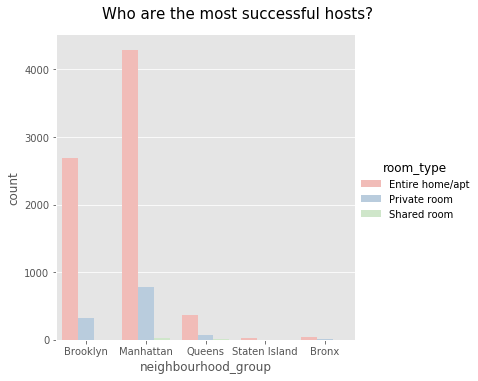

In [267]:
# The count of the 75% percentile hosts according to different room_type in different areas
df2 = df[df['average_revenue']>=df['average_revenue'].quantile(0.75)]
fig3 = sns.catplot(x='neighbourhood_group',data=df2,hue='room_type',kind='count',palette='Pastel1')
fig3.fig.suptitle('Who are the most successful hosts?',fontsize=15,y=1.05)
fig3.savefig('host.png', bbox_inches = 'tight')

In [268]:
df['average_revenue'].quantile(0.75)

37497.5

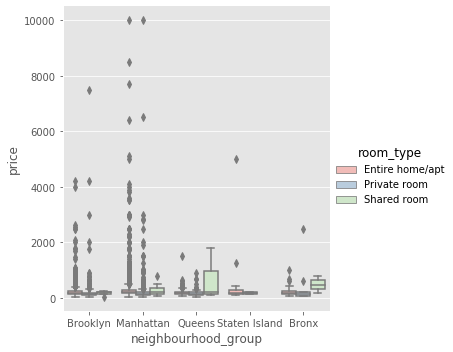

In [205]:
sns.catplot(x='neighbourhood_group',y='price',data=df2,hue='room_type',kind='box',palette='Pastel1')

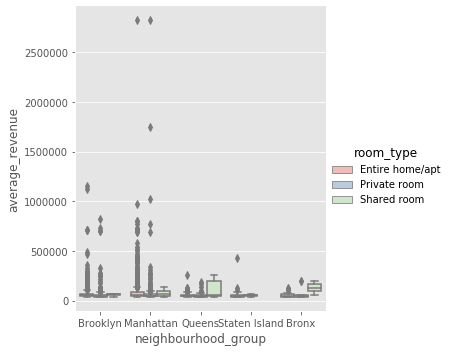

In [206]:
sns.catplot(x='neighbourhood_group',y='average_revenue',data=df2,hue='room_type',kind='box',palette='Pastel1')

Q3. What impact list price?

In [207]:
# Check the types of each variable
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
review_year                                int64
revenue                                    int64
total_revenue                              int64
average_revenue                          float64
dtype: object

In [208]:
# Check the numerical variable
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,revenue,total_revenue,average_revenue
count,3.445000e+04,3.445000e+04,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,3.445000e+04,3.445000e+04,3.445000e+04
mean,2.113167e+07,7.983464e+07,40.728255,-73.949403,158.453991,7.966212,30.797533,1.480379,9.564296,160.070914,1713.647402,2.971850e+04,1.929330e+05,2.932989e+04
std,1.133844e+07,8.579000e+07,0.056094,0.050391,244.551067,22.952423,50.446386,1.747427,38.933375,130.456585,723.120642,4.790159e+04,8.745475e+05,4.431212e+04
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.216791e+07,8.481125e+06,40.688632,-73.983190,70.000000,2.000000,2.000000,0.200000,1.000000,32.000000,2018.000000,7.887000e+03,1.655625e+04,9.269250e+03
50%,2.284311e+07,3.993048e+07,40.723200,-73.954330,110.000000,3.000000,10.000000,0.880000,1.000000,141.000000,2019.000000,2.023600e+04,3.512900e+04,2.007500e+04
75%,3.104453e+07,1.400573e+08,40.762888,-73.931262,184.000000,5.000000,37.000000,2.260000,3.000000,292.000000,2019.000000,3.883000e+04,6.851550e+04,3.749750e+04
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,2.820000e+06,8.501971e+06,2.820000e+06


In [251]:
df_new = df.drop(['name','host_name','neighbourhood','last_review','id','host_id','number_of_reviews','review_year','revenue','total_revenue','average_revenue'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a343a2c10>,
      dtype=object)

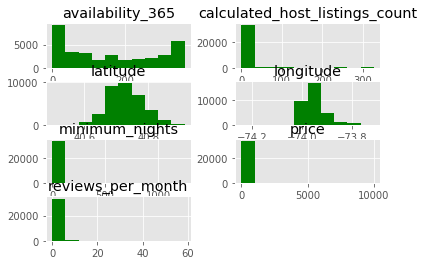

In [252]:
# Check the distribution of each numerical variable
df_new.hist(color='green',layout=(4,2))

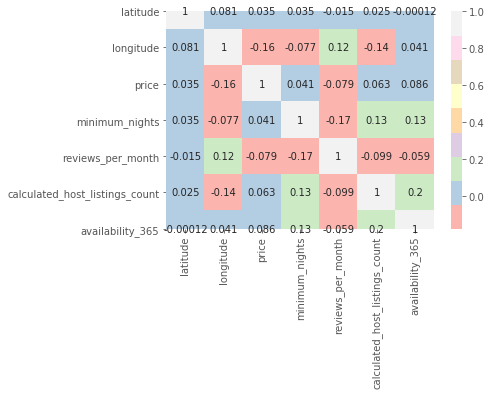

In [253]:
# Check the correlation between numerical variables
sns.heatmap(df_new.corr(),annot = True,cmap='Pastel1')

In [254]:
def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [255]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=22):
  
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [256]:
cat_df = df_new.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
df_new = create_dummy_df(df_new, cat_cols_lst, dummy_na=False)

In [257]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'price', cat_cols_lst, dummy_na=False)

In [258]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.10323911319368428.  The rsquared on the test data was 0.11235239758896665.


In [261]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the results
coef_df

,est_int,coefs,abs_coefs
1,longitude,-491.921066,491.921066
0,latitude,-259.042873,259.042873
9,neighbourhood_group_Staten Island,-161.724708,161.724708
11,room_type_Shared room,-151.236937,151.236937
10,room_type_Private room,-109.509147,109.509147
6,neighbourhood_group_Brooklyn,-43.900817,43.900817
7,neighbourhood_group_Manhattan,32.088458,32.088458
3,reviews_per_month,-7.163875,7.163875
8,neighbourhood_group_Queens,-7.092315,7.092315
2,minimum_nights,-0.181822,0.181822
